系统环境：
- 操作系统：Windows 8.1 64-bit
- CPU：Intel i7-4200HQ 3.60GHz
- RAM：8GB
- GPU: GeForce GTX 970M (CUDA 10.1)

库环境：

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn


print('pandas version：',pd.__version__)
print('matplotlib version：',matplotlib.__version__)
print('seaborn version：',sns.__version__)
print('sklearn version：',sklearn.__version__)

pandas version： 0.23.4
matplotlib version： 2.2.3
seaborn version： 0.9.0
sklearn version： 0.22.2.post1


# 读取数据
- 数据下载地址：[kaggle_Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction)
- 由于数据量大，笔记本内存有限，无法读取和运算如此大量的数据。因此使用dump_data.py进行采样，选取10000条数据进行训练，10000条数据进行测试

## File descriptions：
- train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
- test - Testing set. 1 day of ads to for testing your model predictions. 

## Data fields：
- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

In [2]:
data_train = pd.read_csv(r'./dataset/ctr/train_sample_ctr_8450.csv')
data_test = pd.read_csv(r'.\dataset\ctr\test_sample_ctr_155.csv')

In [3]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8450 entries, 0 to 8449
Data columns (total 24 columns):
id                  8450 non-null uint64
click               8450 non-null int64
hour                8450 non-null int64
C1                  8450 non-null int64
banner_pos          8450 non-null int64
site_id             8450 non-null object
site_domain         8450 non-null object
site_category       8450 non-null object
app_id              8450 non-null object
app_domain          8450 non-null object
app_category        8450 non-null object
device_id           8450 non-null object
device_ip           8450 non-null object
device_model        8450 non-null object
device_type         8450 non-null int64
device_conn_type    8450 non-null int64
C14                 8450 non-null int64
C15                 8450 non-null int64
C16                 8450 non-null int64
C17                 8450 non-null int64
C18                 8450 non-null int64
C19                 8450 non-null int64
C20

In [4]:
data_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.450000e+03,8450.000000,8.450000e+03,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000,8450.000000
mean,9.179895e+18,0.177751,1.410255e+07,1004.959763,0.287219,1.010178,0.346982,18833.676805,319.027219,61.371124,2110.164734,1.446154,222.525680,52899.882604,83.929231
std,5.358954e+18,0.382326,2.981426e+02,1.085978,0.510966,0.514568,0.869565,5012.525716,23.672810,52.690929,615.540273,1.327442,343.077724,49979.530350,70.765039
min,1.275883e+15,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.536772e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.077211e+18,0.000000,1.410252e+07,1005.000000,0.000000,1.000000,0.000000,20352.000000,320.000000,50.000000,2325.000000,2.000000,39.000000,100035.500000,61.000000
75%,1.377866e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100103.000000,110.000000
max,1.844664e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24041.000000,768.000000,1024.000000,2756.000000,3.000000,1839.000000,100248.000000,253.000000


In [5]:
data_test.describe()

,id,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.550000e+02,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,8.928224e+18,1.410311e+07,1005.051613,0.187097,1.051613,0.380645,21478.096774,318.941935,53.780645,2437.064516,1.309677,153.864516,56847.980645,92.683871
std,5.552391e+18,5.682679e+00,0.938315,0.391253,0.507010,0.913613,4764.198700,8.769219,27.678645,607.895654,1.331768,215.958632,49765.040950,87.115519
min,7.968314e+16,1.410310e+07,1002.000000,0.000000,0.000000,0.000000,4687.000000,216.000000,36.000000,423.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.190929e+18,1.410311e+07,1005.000000,0.000000,1.000000,0.000000,22104.000000,320.000000,50.000000,2545.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.154648e+18,1.410311e+07,1005.000000,0.000000,1.000000,0.000000,23141.000000,320.000000,50.000000,2664.000000,1.000000,39.000000,100077.000000,51.000000
75%,1.394021e+19,1.410312e+07,1005.000000,0.000000,1.000000,0.000000,24095.500000,320.000000,50.000000,2761.000000,3.000000,175.000000,100148.000000,221.000000
max,1.835151e+19,1.410312e+07,1010.000000,1.000000,4.000000,3.000000,24320.000000,320.000000,250.000000,2790.000000,3.000000,1327.000000,100233.000000,251.000000


观察上述数据，可以发现数据整体不存在缺失值，数据类型为int或object, 需要对object类型数据进行向量化/离散化。对于ID这个特征，可以看到其方差极大，说明是一个连续的数据，结合经验，可以直接删除该特征

# 数据预处理
- 删除id特征

In [6]:
data_train = data_train.drop('id',axis=1)
data_test = data_test.drop('id',axis=1)

- 观察object类型特征并进行向量化/离散化处理

In [7]:
df_object = data_train.filter(regex='site_id|site_domain|site_category|app_id|app_domain|app_category|device_id|device_ip|device_model')

In [23]:
for itm, column in enumerate(df_object.columns):
    category = df_object.iloc[itm].unique()
    num = len(category)
    print('{}: {} \n num: {}'.format(column, category, num))

site_id: ['6399eda6' '968765cd' 'f028772b' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' 'ffd71479' '76dc4769'] 
 num: 9
site_domain: ['8fda644b' '25d4cfcd' 'f028772b' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' '34674ab0' '6569eeb3'] 
 num: 9
site_category: ['5b4d2eda' '16a36ef3' 'f028772b' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' 'cdc5cc94' '00b1f3a7'] 
 num: 9
app_id: ['d8bb8687' '98e6755b' '3e814130' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' '799d2fa5' 'be6db1d7'] 
 num: 9
app_domain: ['1fbe01fe' 'f3845767' '28905ebd' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' '0a945a46' '8a4875bd'] 
 num: 9
app_category: ['83a0ad1a' '5c9ae867' 'f028772b' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' '01bd946f' 'c48dce72'] 
 num: 9
device_id: ['85f751fd' 'c4e18dd6' '50e219e0' 'e2a1ca37' '2347f47a' '8ded1f7a'
 '324d6925' '51b00dde' 'dc70b0f9'] 
 num: 9
device_ip: ['1fbe01fe' 'f3845767' '28905ebd' 'ecad2386' '7801e8d9' '07d7df22'
 'a99f214a' '2d905ba5' 'c6263d8a'] 
 num: 9
device_model: ['85f

## 特征离散/因子化

In [40]:
site_id = pd.get_dummies(data_train['site_id'], prefix= 'site_id')
site_domain = pd.get_dummies(data_train['site_domain'], prefix= 'site_domain')
site_category = pd.get_dummies(data_train['site_category'], prefix= 'site_category')
app_id = pd.get_dummies(data_train['app_id'], prefix= 'app_id')
app_domain = pd.get_dummies(data_train['app_domain'], prefix= 'app_domain')
app_category = pd.get_dummies(data_train['app_category'], prefix= 'app_category')
device_id = pd.get_dummies(data_train['device_id'], prefix= 'device_id')
device_ip = pd.get_dummies(data_train['device_ip'], prefix= 'device_ip')
device_model = pd.get_dummies(data_train['device_model'], prefix= 'device_model')

df = pd.concat([site_id, site_domain, site_category, 
                app_id, app_domain, app_category, 
                device_id, device_ip, device_model], axis=1)
df.columns

Index(['site_id_021cd138', 'site_id_02296256', 'site_id_023f3644',
       'site_id_0273c5ad', 'site_id_02d5151c', 'site_id_030440fe',
       'site_id_05c65e53', 'site_id_06a0ac14', 'site_id_070ca277',
       'site_id_079325ff',
       ...
       'device_model_feacaaee', 'device_model_feb70d53',
       'device_model_ff065cf0', 'device_model_ff0f1aca',
       'device_model_ff16d623', 'device_model_ff2a3543',
       'device_model_ff607a1a', 'device_model_ff91ea03',
       'device_model_ffc70ef9', 'device_model_ffe69079'],
      dtype='object', length=11919)

# 训练
## 1. 少特征训练
- 只选择int类型数据进行训练

In [104]:
def train(train_np):
    from sklearn import linear_model
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    import time
    # y即Survival结果
    y = train_np[:, 0]
    # X即特征属性值
    X = train_np[:, 1:]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf = linear_model.LogisticRegression(C=1,penalty="l2")
    t1 = time.time()
    clf.fit(X_train,y_train)
    t2 = time.time()
    y_pred = clf.predict(X_test)
#     print('accuracy:{:.3f}%, tims:{:.3f}s'.format(accuracy_score(y_test, y_pred)*100,(t2-t1)))
    return accuracy_score(y_test, y_pred), (t2-t1)

In [118]:
def train_cv(train_np):
    from sklearn import linear_model
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    import time
    # y即Survival结果
    y = train_np[:, 0]
    # X即特征属性值
    X = train_np[:, 1:]

    clf = linear_model.LogisticRegression(C=1,penalty="l2")
    t1 = time.time()
    scores = cross_val_score(clf, X, y, cv=5)
    t2 = time.time()
    return np.mean(scores), (t2-t1)/5

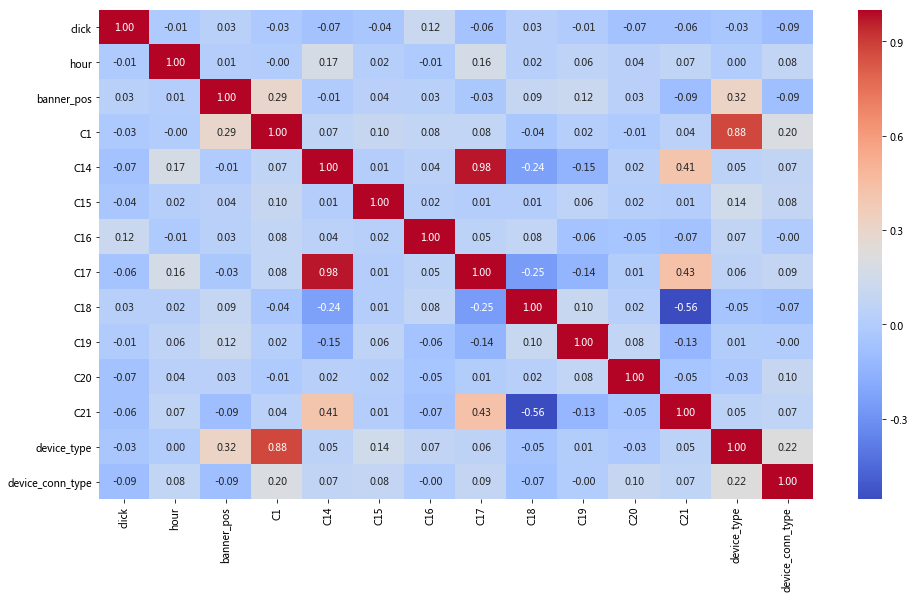

In [94]:
import time
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(data_train[["click","hour","banner_pos","C1","C14","C15","C16",
                        "C17","C18","C19","C20","C21","device_type","device_conn_type"]].corr(),
            annot=True, fmt = ".2f", cmap = "coolwarm") 
plt.show()

通过上图可以看出单一数值型的特征与标签的线性关系并不是很大，下面看一下训练的效果

In [124]:
few_feature_df = data_train.filter(regex='click|hour|C.*|banner_pos|device_type|device_conn_type')
print('num of feature:',len(few_feature_df.columns))
few_feature_np = few_feature_df.values
acc, t = train_cv(few_feature_np)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

num of feature: 14
accuracy:82.225%, tims:0.035s


## 全特征训练
- 使用数值类特征以及特征离散化过后的特征（共计：11931个）

In [125]:
all_feature_df = pd.concat([few_feature_df, df], axis=1)
print('num of feature:',len(all_feature_df.columns))
all_feature_np = all_feature_df.values
acc, t = train_cv(all_feature_np)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

num of feature: 11933
accuracy:82.225%, tims:7.074s


选取部分特征和全特征进行训练最终的结果一直，但时间消耗相差数倍。因此我们应当进行特征选择
## 选择部分特征
- site_domain, site_category

In [115]:
df_1 = pd.concat([data_train, site_domain, site_category], axis=1)
df_1.drop(['site_domain', 'site_category'], axis=1, inplace=True)
train_df = df_1.filter(regex='click|site_domain_.*|hour|site_category_.*|C.*|banner_pos')
train_np = train_df.values
acc, t = train_cv(train_np)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.225%, tims:1.448s


看到结果还是没有什么太大的变化，通过之前观察数据，部分特征的量纲之间差距很大，接下来进行特征数据标准化，来看一下效果。
## 标准化
- StandardScaler() → 均值为0，方差为1
- MinMaxScaler() → [0, 1]
- MaxAbsScaler() → [-1, 1]

In [116]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
import warnings
warnings.filterwarnings('ignore')

scalers = [MinMaxScaler(),
         StandardScaler(),
         MaxAbsScaler()]
names = ['MinMaxScaler','StandardScaler()','MaxAbsScaler']
for name, scaler in zip(names,scalers):
    print(name,':')
    temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos|device_type|device_conn_type'))
    temp = pd.DataFrame(temp, 
                        columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                                 'C19_s','C20_s','C21_s','banner_pos_s','device_type_s','device_conn_type_s'])
    df_1_s = pd.concat([data_train['click'], temp, site_domain, site_category], axis=1)
    acc, t = train_cv(df_1_s.values)
    print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

MinMaxScaler :
accuracy:82.178%, tims:2.935s
StandardScaler() :
accuracy:82.142%, tims:2.540s
MaxAbsScaler :
accuracy:82.166%, tims:2.866s


通过效果看出，对于该问题使用MinMaxScaler()效果比较好，也是因为其与特征都进行离散化（[0, 1]）,这样量纲统一了。

接下来尝试再增加特征：
由于ip信息大部分均为不同的数据，做为特征时对结果会产生负影响。因此排除ip类的特征，选取其与特征

In [117]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos|device_type|device_conn_type'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s','device_type_s','device_conn_type_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,site_domain,site_category,
                                 app_domain,app_category,device_model], axis=1)
acc, t = train_cv(selected_feature_df.values)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.154%, tims:7.976s


- 在尝试减少特征：删去domain类特征

In [126]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos|device_type|device_conn_type'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s','device_type_s','device_conn_type_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,site_category,
                                 app_category,device_model], axis=1)
acc, t = train_cv(selected_feature_df.values)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.059%, tims:1.255s


- 选取site类特征以及其他特征，不选取app和device类特征

In [127]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,site_id, site_domain,site_category], axis=1)
acc, t = train_cv(selected_feature_df.values)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.130%, tims:0.973s


- 选取app类特征以及其他特征，不选取site和device类特征

In [128]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,app_id, app_domain, app_category], axis=1)
acc, t = train_cv(selected_feature_df.values)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.178%, tims:0.546s


- 选取device类特征以及其他特征，不选取app和site类特征

In [129]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos|device_type|device_conn_type'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s','device_type_s','device_conn_type_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,device_id, device_ip, device_model], axis=1)
acc, t = train_cv(selected_feature_df.values)
print('accuracy:{:.3f}%, tims:{:.3f}s'.format(acc*100,t))

accuracy:82.012%, tims:8.948s


>通过特征选择，准确率提升的提升并不是很大，因此尝试通过对逻辑回归模型调参

## 模型调参


In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# set data
scaler = MinMaxScaler()
temp = scaler.fit_transform(df_1.filter(regex='hour|C.*|banner_pos|device_type|device_conn_type'))
trian_data_scalered = pd.DataFrame(temp, 
                    columns=['hour_s','C1_s','C14_s','C15_s','C16_s','C17_s','C18_s',
                            'C19_s','C20_s','C21_s','banner_pos_s','device_type_s','device_conn_type_s'])
selected_feature_df = pd.concat([data_train['click'], trian_data_scalered,site_domain,site_category,
                                 app_domain,app_category,device_model], axis=1)
X = selected_feature_df.values[:,1:]
y = selected_feature_df.values[:,0]
# set train model
clf = linear_model.LogisticRegression()
param_LR = {'C':[0.01, 0.1, 0.5, 1, 5, 20, 50],
           'penalty':['l1'],
           'solver':['liblinear','saga'],
           'class_weight':['balanced','None']}
clf_gscv_l1 = GridSearchCV(clf, param_grid = param_LR, cv=5, scoring="accuracy", n_jobs= 8, verbose = 1)
clf_gscv_l1.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   43.2s
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 20, 50],
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [152]:
print(clf_gscv_l1.best_estimator_)
print(clf_gscv_l1.best_score_)

LogisticRegression(C=0.1, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
0.8223668639053254


In [153]:
clf = linear_model.LogisticRegression()
param_LR = {'C':[0.01, 0.1, 0.5, 1, 5, 20, 50],
           'penalty':['l2'],
           'solver':['newton-cg','lbfgs','liblinear'],
           'class_weight':['balanced','None']}
clf_gscv_l2 = GridSearchCV(clf, param_grid = param_LR, cv=5, scoring="accuracy", n_jobs= 8, verbose = 1)
clf_gscv_l2.fit(X, y) 

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 210 out of 210 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 20, 50],
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verb

In [154]:
print(clf_gscv_l2.best_estimator_)
print(clf_gscv_l2.best_score_)

LogisticRegression(C=0.01, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
0.8222485207100592


由于逻辑回归中L1和L2近适用于不同的优化算法（solver）,所以分开进行调参。因为数据的标签是不均衡的，所以在调参中增添了标签均衡，但由于开启标签均衡后会导致训练集准确率下降，所以这里最佳参数中class_weight=None。但为了预防过拟合的情况，还需将将参数class_weight='balanced'